# Table of Contents
 <p><div class="lev3"><a href="#MAP推定(maximum-posterior)"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>MAP推定(maximum posterior)</a></div><div class="lev2"><a href="#MCMC"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>MCMC</a></div><div class="lev3"><a href="#棄却サンプリング"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>棄却サンプリング</a></div><div class="lev3"><a href="#重点サンプリング"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>重点サンプリング</a></div><div class="lev3"><a href="#マルコフ連鎖モンテカルロ"><span class="toc-item-num">0.1.3&nbsp;&nbsp;</span>マルコフ連鎖モンテカルロ</a></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

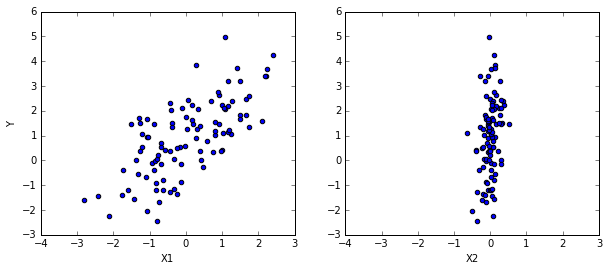

In [2]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [3]:
from pymc3 import Model, Normal, HalfNormal

In [5]:
basic_model = Model()

with basic_model:
    # prior for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)
    
    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1]*X2
    
    # LIkelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)
    

### MAP推定(maximum posterior)
パラメーターについての事前分布があったときに、事後分布における最大値をとるようなパラメーターの値を求めること。
これは、正則化された二乗和誤差の最小化と等価。

$p(t|x,w,\beta)=N(t|y(x,w),\beta^{-1}$

$p(t|x,w,\beta)=\Pi^{N}_{n=1}N(t_n|y(x_n,w),\beta^{-1})$

$\ln p(t|x,w,\beta)=\sum_{n=1}^N \ln (t_n|y(x_n,w),\beta^{-1})$

$=\sum_{n=1}^N \ln\sqrt{\frac{\beta}{2\pi}}\exp\{-\frac{\beta}{2}(t_n-y(x_n,w))^2\}$

$=\frac{N}{2}\ln \beta - \frac{N}{2} \ln 2\pi - \frac{\beta}{2}\sum^N_{n=1}\{t_n-y(x_n,w)\}^2$

対数尤度を最大化するwはΣを最小化する→誤差二乗和の最小化と同じ

wについての事前分布を考える。
$p(w|\alpha)=N(w|9,\alpha^{-1}I)=(\frac{\alpha}{2\pi})^{(M+1)/2}\exp\{-\frac{\alpha}{2}w^Tw\}$


ベイズの定理から

$p(w|x,t,\alpha,\beta)\propto p(t|x,w,\beta)p(w|\alpha)$

対数尤度を考えると

$\ln p(t|x,w,\beta)p(w|\alpha)=\ln p(t|x,w,\beta) + \ln p(w|\alpha) $

$=\frac{N}{2}\ln \beta - \frac{N}{2} \ln 2\pi - \frac{\beta}{2}\sum^N_{n=1}\{t_n-y(x_n,w)\}^2+\frac{M+1}{2}\ln \frac{\alpha}{2\pi}-\frac{\alpha}{2}w^Tw$

誤差二乗和+wについての重み項を最小化することになる

参考：PRML

In [6]:
from pymc3 import find_MAP

map_estimate = find_MAP(model=basic_model)

print(map_estimate)

         Current function value: 149.017980
         Iterations: 15
         Function evaluations: 248
         Gradient evaluations: 230
{'alpha': array(0.9065933227539062, dtype=float32), 'sigma_log_': array(-0.032793186604976654, dtype=float32), 'beta': array([ 0.94849044,  2.60706568], dtype=float32)}


## MCMC

ある確率変数zの関数f(z)の期待値は

$E[f] = \int f(z) p(z) dz$

で与えられるが、たいてい解析的には解けない。そこで、確率変数の観測値を使って

$\hat{f}=\frac{1}{L}\sum_l^{L} f(z^{(l)}$

とすればいい。

任意の確率分布からサンプルされた乱数列を生成する必要がある。

逆関数法を使えば、一様分布の乱数から標準的な分布からの乱数に変換することができるが、それも特定の関数にしか使えない。そこで、別のアプローチを考える。棄却サンプリング、重点サンプリングである。

### 棄却サンプリング



### 重点サンプリング

### マルコフ連鎖モンテカルロ
棄却サンプリング、重点サンプリングともに問題がある。



In [7]:
from pymc3 import NUTS, sample
from scipy import optimize

with basic_model:
    # draw 2000 psoterior samples
    trace = sample(2000)

 99%|█████████▉| 1983/2000 [00:02<00:00, 950.67it/s]/Users/kazumasa/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:237: UserWarning: Step size tuning was enabled throughout the whole trace. You might want to specify the number of tuning steps.
  warnings.warn('Step size tuning was enabled throughout the whole '
/Users/kazumasa/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
100%|██████████| 2000/2000 [00:02<00:00, 793.58it/s]


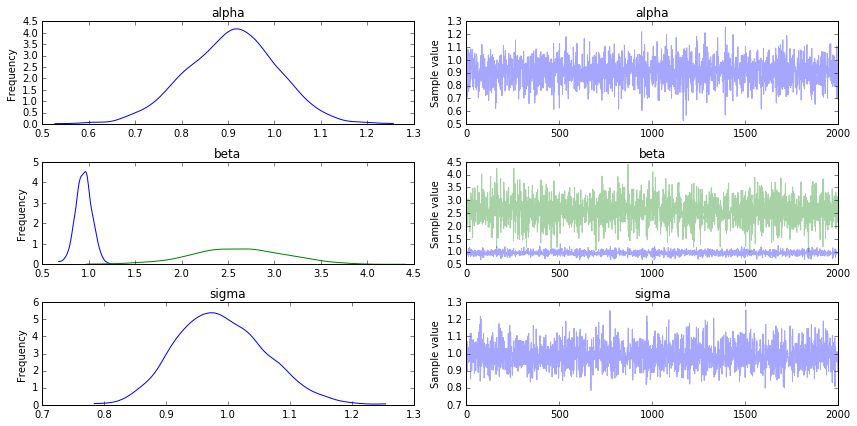

In [8]:
from pymc3 import traceplot

traceplot(trace);